In [1]:
cd 13510

In [2]:
punlearn centroid_map
plist centroid_map
/bin/rm -rf centroid_map
mkdir centroid_map


Parameters for /home/kjg/cxcds_param4/centroid_map.par

        infile =                  Input counts image
       outfile =                  Output map file
      (numiter = 1)               Number of centroid iterations
     (sitefile = )                Input initial site locations
        (scale = linear)          Scaling applied to pixel values when computing centroid
      (verbose = 1)               Tool chatter level
      (clobber = yes)             Remove outfile if it already exists?
         (mode = ql)              



In [3]:
aconvolve img.fits centroid_map/img.sm "lib:gaus(2,5,5,9,9)" meth=slide edge=const const=0 clob+

In [4]:
time centroid_map \
  infile=centroid_map/img.sm \
  outfile=centroid_map/cntrd.map \
  numiter=20 \
  mode=h clob+ verb=2   # verb=2 leaves debugging files
  

centroid_map
          infile = centroid_map/img.sm
         outfile = centroid_map/cntrd.map
         numiter = 20
        sitefile = 
           scale = linear
         verbose = 2
         clobber = yes
            mode = h

Running tool vtbin using:
>>> vtbin centroid_map/img.sm /tmp/tmpoi5y3o0h clobber=yes
Working iteration 0
Running tool vtbin using:
>>> vtbin centroid_map/img.sm /tmp/tmpxjmzq7ak sitefile=/tmp/tmpuzu1lrgl clobber=yes
Number of pixels different: 95090
Running tool dmcopy using:
>>> dmcopy /tmp/tmpuzu1lrgl centroid_map/cntrd.map.i000 clobber=yes
Working iteration 1
Running tool vtbin using:
>>> vtbin centroid_map/img.sm /tmp/tmpy9rmpy0n sitefile=/tmp/tmpt1vrnxpy clobber=yes
Number of pixels different: 61844
Running tool dmcopy using:
>>> dmcopy /tmp/tmpt1vrnxpy centroid_map/cntrd.map.i001 clobber=yes
Working iteration 2
Running tool vtbin using:
>>> vtbin centroid_map/img.sm /tmp/tmpzjdvp_09 sitefile=/tmp/tmpwal8s7_i clobber=yes
Number of pixels different: 53292
Ru

In [5]:
dmimggrad centroid_map/cntrd.map centroid_map/cntrd.grad sobel mag clob+

In [6]:
dmmaskbin img.fits centroid_map/cntrd.map centroid_map/cntrd.img clob+

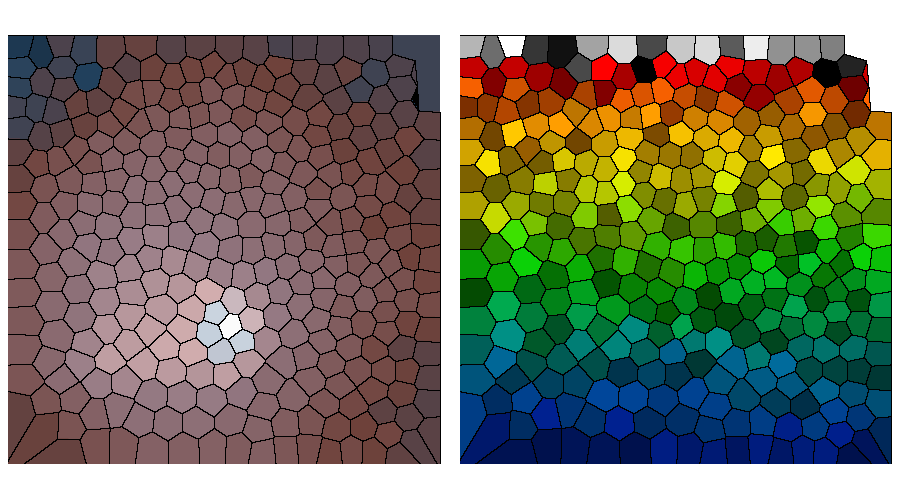

In [7]:
ds9 -geometry 900x600 \
  -view colorbar no -view info no -view panner no -view magnifier no \
  centroid_map/cntrd.img -scale log \
  -cmap load sunset-in-atlantis.sao \
  -mask color black -mask centroid_map/cntrd.grad -nomask \
  -region select all -region color black -region select none \
  -block to 2 \
  centroid_map/cntrd.map -scale linear \
  -region delete all \
  -mask color black -mask centroid_map/cntrd.grad -nomask \
  -cmap load $ASCDS_CONTRIB/data/16_ramps.lut \
  -block to 1 -zoom to 0.5 \
  -tile column \
  -saveimage png centroid_map/cntrd.abin.png -quit

display < centroid_map/cntrd.abin.png

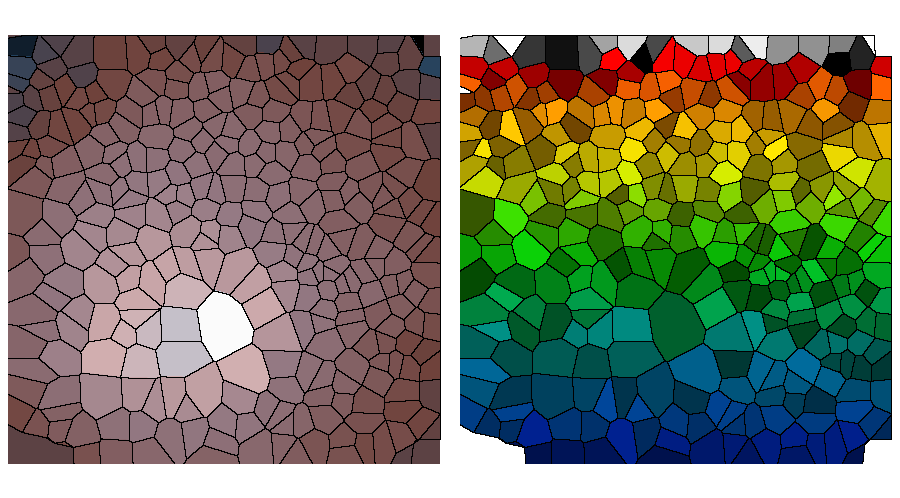

In [8]:
display < vtbin/vtbin.abin.png

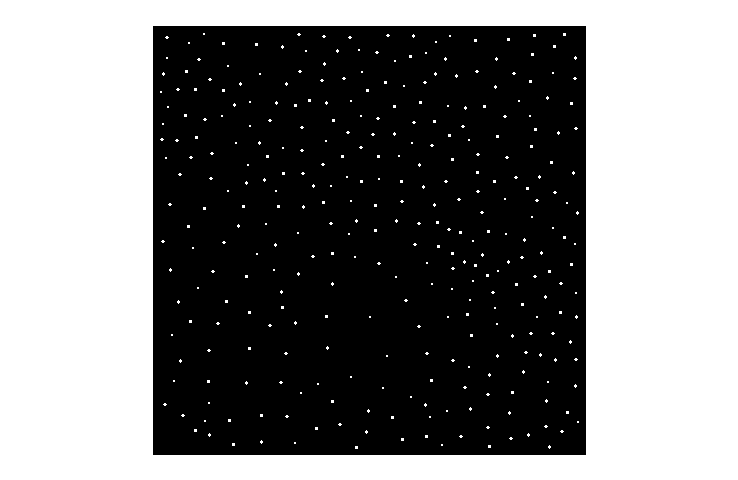

In [9]:
ds9 -smooth -scale limits 0 0.01 -zoom to 0.5 \
  -view colorbar no \
  centroid_map/cntrd.map.i*  \
  -movie frame gif centroid_map/cntrd.gif \
  -quit

display < centroid_map/cntrd.gif

In [10]:
time centroid_map \
  infile=centroid_map/img.sm \
  outfile=centroid_map/sqrt.map \
  numiter=20 \
  scale=sqrt \
  mode=h clob+ verb=1
  

centroid_map
          infile = centroid_map/img.sm
         outfile = centroid_map/sqrt.map
         numiter = 20
        sitefile = 
           scale = sqrt
         verbose = 1
         clobber = yes
            mode = h

Working iteration 0
Working iteration 1
Working iteration 2
Working iteration 3
Working iteration 4
Working iteration 5
Working iteration 6
Working iteration 7
Working iteration 8
Working iteration 9
Working iteration 10
Working iteration 11
Working iteration 12
Working iteration 13
Working iteration 14
Working iteration 15
Working iteration 16
Working iteration 17
Working iteration 18
Working iteration 19

real	2m38.232s
user	2m24.845s
sys	0m13.258s


In [11]:
dmimggrad centroid_map/sqrt.map centroid_map/sqrt.grad sobel mag clob+

In [12]:
dmmaskbin img.fits centroid_map/sqrt.map centroid_map/sqrt.img clob+

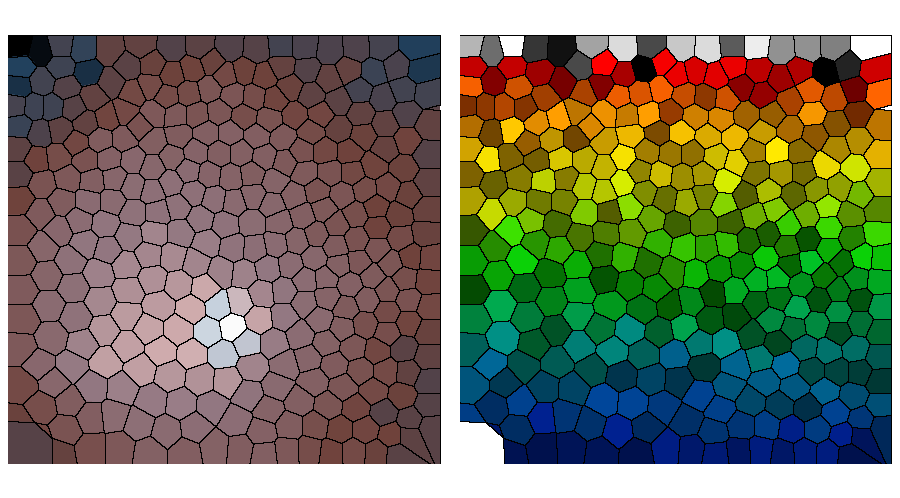

In [13]:
ds9 -geometry 900x600 \
  -view colorbar no -view info no -view panner no -view magnifier no \
  centroid_map/sqrt.img -scale log \
  -cmap load sunset-in-atlantis.sao \
  -mask color black -mask centroid_map/sqrt.grad -nomask \
  -region select all -region color black -region select none \
  -block to 2 \
  centroid_map/sqrt.map -scale linear \
  -region delete all \
  -mask color black -mask centroid_map/sqrt.grad -nomask \
  -cmap load $ASCDS_CONTRIB/data/16_ramps.lut \
  -block to 1 -zoom to 0.5 \
  -tile column \
  -saveimage png centroid_map/sqrt.abin.png -quit

display < centroid_map/sqrt.abin.png